**Outlier Analysis Part II detail**

the step copied from https://www.kaggle.com/kevinarvai/outlier-detection-practice-uni-multivariate

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
np.random.seed(42)
jumlah_data = 3
df = pd.DataFrame(np.random.normal(scale=10.0, size=(1000, jumlah_data)), columns=['temp{}'.format(i) for i in range(jumlah_data)])

In [7]:
df

,temp0,temp1,temp2
0,4.967142,-1.382643,6.476885
1,15.230299,-2.341534,-2.341370
2,15.792128,7.674347,-4.694744
3,5.425600,-4.634177,-4.657298
4,2.419623,-19.132802,-17.249178
...,...,...,...
995,-9.600463,-1.227089,0.933724
996,-11.302037,24.116767,15.163941
997,6.021183,0.720369,-2.122090
998,-9.519185,0.774805,2.577525


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa84fb85c18>,
      dtype=object)

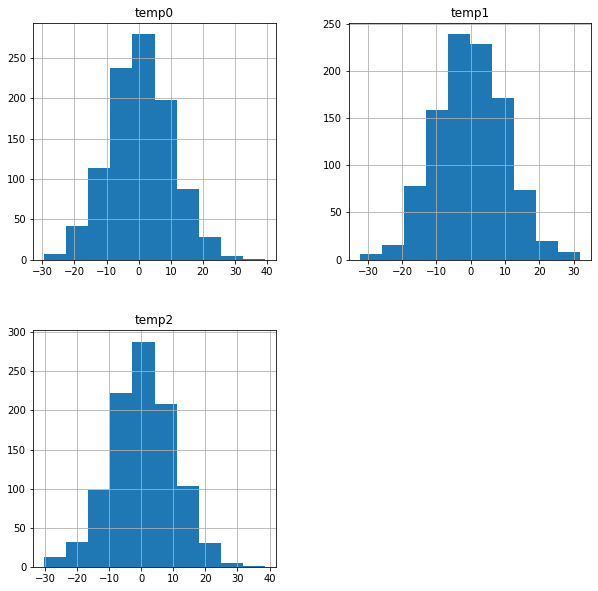

In [9]:
df.hist(figsize=(10,10))

In [10]:
#check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp0   1000 non-null   float64
 1   temp1   1000 non-null   float64
 2   temp2   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [11]:
df.dtypes

temp0    float64
temp1    float64
temp2    float64
dtype: object

In [12]:
df.describe()

,temp0,temp1,temp2
count,1000.000000,1000.000000,1000.000000
mean,0.550110,-0.059686,0.469600
std,9.702123,10.085704,9.811187
min,-29.403886,-32.412673,-30.195122
25%,-5.843497,-6.885447,-6.041716
50%,0.568315,-0.172851,0.422016
75%,6.643464,6.705497,6.795840
max,39.262377,31.931076,38.527315


In [0]:
def out_std(s, nstd=3.0, return_threshold = False):
  data_mean, data_std = s.mean(), s.std()
  cut_off = data_std*nstd
  lower, upper = data_mean - cut_off, data_mean+cut_off

  if return_threshold:
    return lower, upper
  return [True if x < lower or x > upper else False for x in s]

In [0]:
def out_iqr (s, k=1.5, return_threshold= False):
  q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
  iqr = q75 - q25
  cut_off = iqr*k
  lower, upper = iqr- cut_off, iqr+cut_off

  if return_threshold:
    return lower, upper
  return [True if x < lower or x > upper else False for x in s]


In [15]:
#data temp0 check
outlier_check0 = out_std(df['temp0'], nstd=3.0)
outlier_check0[:10]

[False, False, False, False, False, False, False, False, False, False]

In [17]:
df['temp0'][outlier_check0]

367   -28.962554
513   -28.722622
657   -29.403886
965    39.262377
Name: temp0, dtype: float64

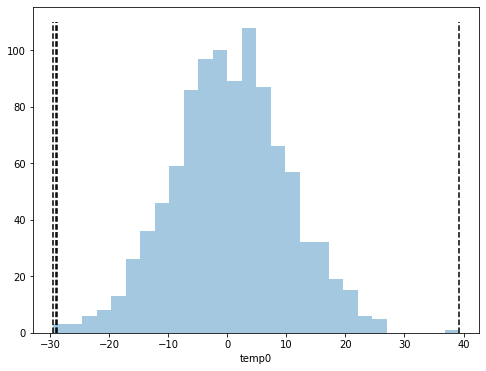

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(df['temp0'], kde=False);
plt.vlines(df['temp0'][outlier_check0], ymin=0, ymax=110, linestyles='dashed');

In [0]:
#region standart dev area
def plot_cutoff(s, nstd=2.0, color='red'):
  lower, upper = out_std(s, nstd=nstd, return_threshold=True)
  plt.axvspan(min(s[s < lower], default=s.min()), lower, alpha=0.2, color=color);
  plt.axvspan(upper, max(s[s > upper], default=s.max()), alpha=0.2, color=color);


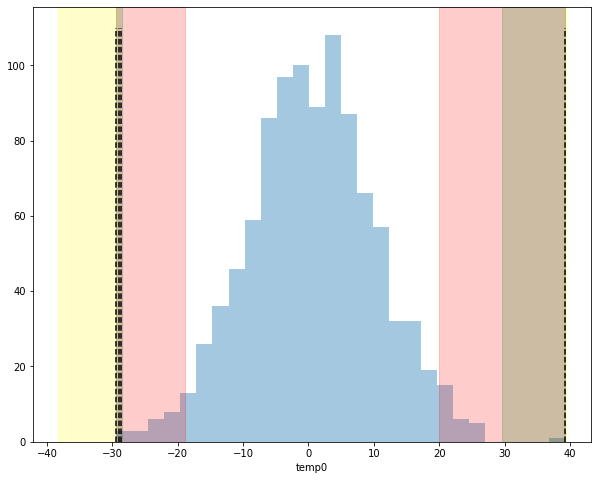

In [32]:
plt.figure(figsize=(10,8))
sns.distplot(df['temp0'], kde=False)
plt.vlines(df['temp0'][outlier_check0], ymin=0, ymax=110, linestyles='dashed');
plot_cutoff(df['temp0'], nstd=2.0, color='red')
plot_cutoff(df['temp0'], nstd=3.0, color='green')
plot_cutoff(df['temp0'], nstd=4.0, color='yellow')
